In [1]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'Q2 Dataset\dataset.csv'
dataset = pd.read_csv(file_path, header=None)
# Normalize each face image vector to unit length
normalized_dataset = dataset.div(np.linalg.norm(dataset, axis=1), axis=0)

# Verify the shape of the normalized dataset
normalized_dataset.shape

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Talal_HP\AppData\Local\Temp\ipykernel_19632\3890991666.py:5: SyntaxWarning: invalid escape sequence '\d'
  file_path = 'Q2 Dataset\dataset.csv'


(1700, 1024)

## Analysis using full 150 train and 20 test

In [12]:
from sklearn.model_selection import train_test_split

# Initialize lists to store training and testing data
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []

# For each of the 10 subjects
for i in range(10):
    # Select rows corresponding to the current subject
    subject_data = normalized_dataset.iloc[i*170:(i+1)*170]
    # Generate labels for the current subject
    labels = [i] * 170  # Using 'i' as the label for the ith subject
    
    # Split the data for the current subject into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(subject_data, labels, test_size=20, random_state=42, shuffle=True)
    
    # Append the split data to their respective lists
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

# Combine the training and testing sets for all subjects
X_train = pd.concat(X_train_list)
X_test = pd.concat(X_test_list)
y_train = np.concatenate(y_train_list)
y_test = np.concatenate(y_test_list)

# Verify the shapes of the final training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1500, 1024), (200, 1024), (1500,), (200,))

In [21]:
def euclidean_distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2) ** 2))

def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

class KNNClassifier:
    def __init__(self, k=5, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predictions = []
        for x in X:
            # Calculate distances from the current point to all training points
            if self.distance_metric == 'euclidean':
                distances = np.array([euclidean_distance(x, x_train) for x_train in self.X_train])
            else: # cosine similarity
                distances = np.array([1 - cosine_similarity(x, x_train) for x_train in self.X_train])
            
            # Get the indices of the k nearest neighbors
            k_nearest_neighbors = np.argsort(distances)[:self.k]
            
            # Get the labels of the k nearest neighbors
            k_nearest_labels = self.y_train[k_nearest_neighbors]
            
            # Predict the label by majority vote
            unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
            predicted_label = unique_labels[np.argmax(counts)]
            predictions.append(predicted_label)
        return predictions

# Convert DataFrame to NumPy arrays for compatibility with our classifier
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

# Placeholder for storing results
results = []

# Testing for different values of k and distance metrics
for k in [2, 5, 7, 11]:
    for distance_metric in ['euclidean', 'cosine']:
        classifier = KNNClassifier(k=k, distance_metric=distance_metric)
        classifier.fit(X_train_np, y_train)
        predictions = classifier.predict(X_test_np)
        
        # Calculate accuracy
        accuracy = np.mean(predictions == y_test)
        results.append((k, distance_metric, accuracy))

results




[(2, 'euclidean', 0.99),
 (2, 'cosine', 0.99),
 (5, 'euclidean', 0.98),
 (5, 'cosine', 0.98),
 (7, 'euclidean', 0.96),
 (7, 'cosine', 0.96),
 (11, 'euclidean', 0.955),
 (11, 'cosine', 0.955)]

## Analysis using full 100 train and 70 test

In [18]:
from sklearn.model_selection import train_test_split

# Initialize lists to store training and testing data
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []

# For each of the 10 subjects
for i in range(10):
    # Select rows corresponding to the current subject
    subject_data = normalized_dataset.iloc[i*170:(i+1)*170]
    # Generate labels for the current subject
    labels = [i] * 170  # Using 'i' as the label for the ith subject
    
    # Split the data for the current subject into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(subject_data, labels, test_size=70, random_state=42, shuffle=True)
    
    # Append the split data to their respective lists
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

# Combine the training and testing sets for all subjects
X_train = pd.concat(X_train_list)
X_test = pd.concat(X_test_list)
y_train = np.concatenate(y_train_list)
y_test = np.concatenate(y_test_list)

# Verify the shapes of the final training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1000, 1024), (700, 1024), (1000,), (700,))

In [7]:
def euclidean_distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2) ** 2))

def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

class KNNClassifier:
    def __init__(self, k=5, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predictions = []
        for x in X:
            # Calculate distances from the current point to all training points
            if self.distance_metric == 'euclidean':
                distances = np.array([euclidean_distance(x, x_train) for x_train in self.X_train])
            else: # cosine similarity
                distances = np.array([1 - cosine_similarity(x, x_train) for x_train in self.X_train])
            
            # Get the indices of the k nearest neighbors
            k_nearest_neighbors = np.argsort(distances)[:self.k]
            
            # Get the labels of the k nearest neighbors
            k_nearest_labels = self.y_train[k_nearest_neighbors]
            
            # Predict the label by majority vote
            unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
            predicted_label = unique_labels[np.argmax(counts)]
            predictions.append(predicted_label)
        return predictions

# Convert DataFrame to NumPy arrays for compatibility with our classifier
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

# Placeholder for storing results
results = []

# Testing for different values of k and distance metrics
for k in [2, 5, 7, 11]:
    for distance_metric in ['euclidean', 'cosine']:
        classifier = KNNClassifier(k=k, distance_metric=distance_metric)
        classifier.fit(X_train_np, y_train)
        predictions = classifier.predict(X_test_np)
        
        # Calculate accuracy
        accuracy = np.mean(predictions == y_test)
        results.append((k, distance_metric, accuracy))

results


[(2, 'euclidean', 0.9514285714285714),
 (2, 'cosine', 0.9514285714285714),
 (5, 'euclidean', 0.9342857142857143),
 (5, 'cosine', 0.9342857142857143),
 (7, 'euclidean', 0.9242857142857143),
 (7, 'cosine', 0.9242857142857143),
 (11, 'euclidean', 0.9114285714285715),
 (11, 'cosine', 0.9114285714285715)]

## Using built in SVM & Guassian

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
file_path = 'Q2 Dataset\dataset.csv'
dataset = pd.read_csv(file_path, header=None)

# Normalize each face image vector to unit length
normalized_dataset = dataset.div(np.linalg.norm(dataset, axis=1), axis=0)

# Initialize lists to store training and testing data
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []

# For each of the 10 subjects
for i in range(10):
    # Select rows corresponding to the current subject
    subject_data = normalized_dataset.iloc[i*170:(i+1)*170]
    # Generate labels for the current subject
    labels = [i] * 170  # Using 'i' as the label for the ith subject
    
    # Split the data for the current subject into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(subject_data, labels, test_size=20, random_state=42, shuffle=True)
    
    # Append the split data to their respective lists
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

# Combine the training and testing sets for all subjects
X_train = pd.concat(X_train_list)
X_test = pd.concat(X_test_list)
y_train = np.concatenate(y_train_list)
y_test = np.concatenate(y_test_list)

# Convert DataFrame to NumPy arrays for compatibility with classifiers
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

# Train SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_np, y_train)

# Train GaussianNB classifier
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train_np, y_train)

# Evaluate classifiers
svm_accuracy = svm_classifier.score(X_test_np, y_test)
gnb_accuracy = gnb_classifier.score(X_test_np, y_test)

# Print accuracies
print("SVM Accuracy:", svm_accuracy)
print("GaussianNB Accuracy:", gnb_accuracy)

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Talal_HP\AppData\Local\Temp\ipykernel_19632\767072086.py:9: SyntaxWarning: invalid escape sequence '\d'
  file_path = 'Q2 Dataset\dataset.csv'


SVM Accuracy: 1.0
GaussianNB Accuracy: 0.85


## PCA

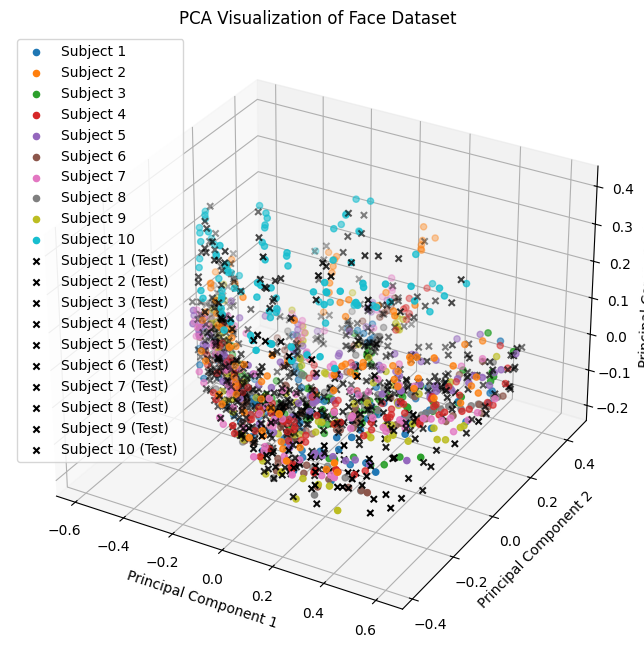

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'Q2 Dataset/dataset.csv'  
dataset = pd.read_csv(file_path, header=None)

# Normalize each face image vector to unit length
normalized_dataset = dataset.div(np.linalg.norm(dataset, axis=1), axis=0)

# Perform PCA
pca = PCA(n_components=3)  # 3 components for 3-D visualization
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualize in 3-D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot training data
for i in range(10):
    ax.scatter(X_train_pca[y_train == i, 0],
               X_train_pca[y_train == i, 1],
               X_train_pca[y_train == i, 2],
               label=f'Subject {i+1}')

# Plot testing data
for i in range(10):
    ax.scatter(X_test_pca[y_test == i, 0],
               X_test_pca[y_test == i, 1],
               X_test_pca[y_test == i, 2],
               marker='x',
               label=f'Subject {i+1} (Test)',
               color='black')

ax.set_title('PCA Visualization of Face Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()
